## CSC420 - Assignment 3

## Humzah Khan

#### Question 1.3 - Experimental Test for Black Square and White Background (10)

Generate Black Square and White Background

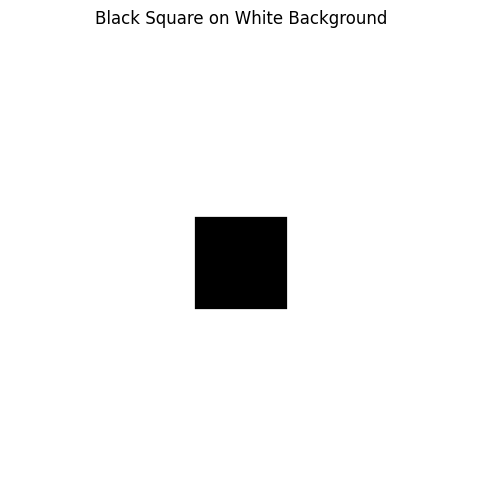

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def generate_black_square_image(size=100, canvas_size=500):
    """
    Generates a white background image with a centered black square.

    Parameters:
        size (int): Side length of the black square.
        canvas_size (int): Size of the full image (white background).

    Returns:
        image (numpy array): The generated test image.
    """
    # Create a white canvas
    image = np.ones((canvas_size, canvas_size), dtype=np.uint8) * 255

    # Compute square start and end positions
    start = (canvas_size - size) // 2
    end = start + size

    # Draw the black square
    image[start:end, start:end] = 0

    return image

# Generate and visualize the image
square_image = generate_black_square_image()
plt.figure(figsize=(6, 6))
plt.imshow(square_image, cmap='gray')
plt.title("Black Square on White Background")
plt.axis("off")
plt.show()


Experimental Approach using Log

Optimal sigma: 39.442


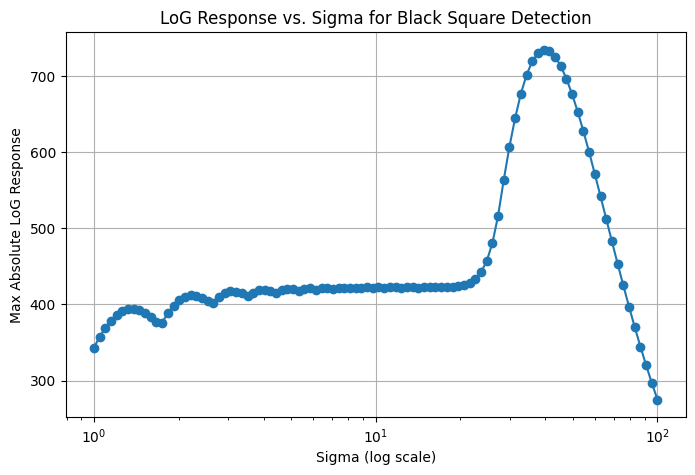

In [10]:
def apply_log_filter(image, sigma):
    """
    Applies the Laplacian of Gaussian (LoG) filter to an image.

    Parameters:
        image (numpy array): Input grayscale image.
        sigma (float): Standard deviation of the Gaussian.

    Returns:
        response (numpy array): The LoG response image.
    """
    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(image.astype(np.float64), (0, 0), sigma)

    # Apply Laplacian Operator
    log_response = cv2.Laplacian(blurred, cv2.CV_64F, ksize=3) * (sigma**2)

    return log_response

# Define sigma values (log-spaced for efficiency)
sigma_values = np.logspace(0, 2, num=100)  # From 10^0 to 10^2 (i.e., 1 to 100)

# Store responses
max_responses = []

# Apply LoG filter for different sigmas and track max response
for sigma in sigma_values:
    log_image = apply_log_filter(square_image, sigma)
    max_response = np.max(np.abs(log_image))  # Measure peak absolute response
    max_responses.append(max_response)

# Find optimal sigma
optimal_sigma = sigma_values[np.argmax(max_responses)]
print(f"Optimal sigma: {optimal_sigma:.3f}")

# Plot response curve
plt.figure(figsize=(8, 5))
plt.plot(sigma_values, max_responses, marker='o', linestyle='-')
plt.xscale("log")  # Log scale for better visualization
plt.xlabel("Sigma (log scale)")
plt.ylabel("Max Absolute LoG Response")
plt.title("LoG Response vs. Sigma for Black Square Detection")
plt.grid(True)
plt.show()


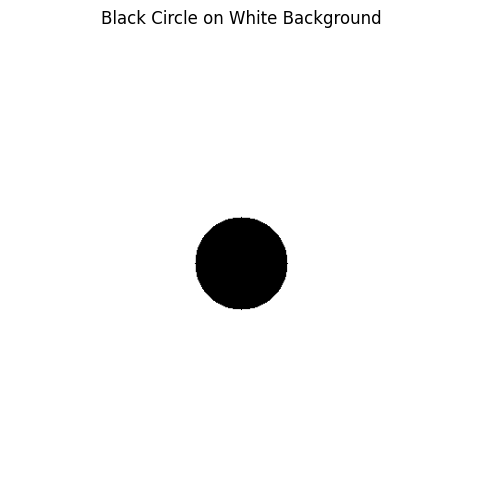

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def generate_black_circle_image(radius=50, canvas_size=500):
    """
    Generates a white background image with a centered black circle.

    Parameters:
        radius (int): Radius of the black circle.
        canvas_size (int): Size of the full image (white background).

    Returns:
        image (numpy array): The generated test image.
    """
    # Create a white canvas
    image = np.ones((canvas_size, canvas_size), dtype=np.uint8) * 255

    # Compute center of the circle
    center = (canvas_size // 2, canvas_size // 2)

    # Draw the black circle
    cv2.circle(image, center, radius, (0, 0, 0), -1)  # -1 fills the circle

    return image

# Generate and visualize the image
circle_image = generate_black_circle_image()
plt.figure(figsize=(6, 6))
plt.imshow(circle_image, cmap='gray')
plt.title("Black Circle on White Background")
plt.axis("off")
plt.show()


Optimal sigma for circle: 35.938


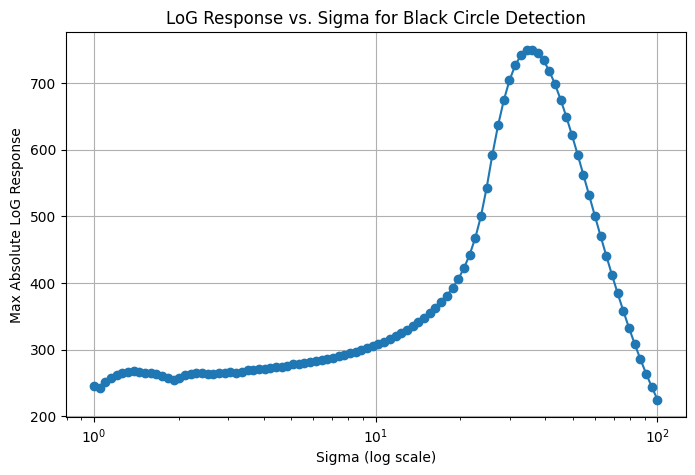

In [9]:
def apply_log_filter(image, sigma):
    """
    Applies the Laplacian of Gaussian (LoG) filter to an image.

    Parameters:
        image (numpy array): Input grayscale image.
        sigma (float): Standard deviation of the Gaussian.

    Returns:
        response (numpy array): The LoG response image.
    """
    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(image.astype(np.float64), (0, 0), sigma)

    # Apply Laplacian Operator
    log_response = cv2.Laplacian(blurred, cv2.CV_64F, ksize=3) * (sigma**2)

    return log_response

# Define sigma values (log-spaced for efficiency)
sigma_values = np.logspace(0, 2, num=100)  # From 10^0 to 10^2 (i.e., 1 to 100)

# Store responses
max_responses = []

# Apply LoG filter for different sigmas and track max response
for sigma in sigma_values:
    log_image = apply_log_filter(circle_image, sigma)
    max_response = np.max(np.abs(log_image))  # Measure peak absolute response
    max_responses.append(max_response)

# Find optimal sigma
optimal_sigma = sigma_values[np.argmax(max_responses)]
print(f"Optimal sigma for circle: {optimal_sigma:.3f}")

# Plot response curve
plt.figure(figsize=(8, 5))
plt.plot(sigma_values, max_responses, marker='o', linestyle='-')
plt.xscale("log")  # Log scale for better visualization
plt.xlabel("Sigma (log scale)")
plt.ylabel("Max Absolute LoG Response")
plt.title("LoG Response vs. Sigma for Black Circle Detection")
plt.grid(True)
plt.show()
